# Ch03. 프로 야구 데이터를 통해 데이터프레임 다루기


> KBO 데이터를 이용해 최정 선수의 일별 누적 장타율 구하기
 



## 1. 웹크롤링 결과를 데이터프레임으로 불러오기 (read_html)

### 학습 목표
- 웹 페이지에서 표를 데이터 프레임으로 불러온다. (`read_html` 함수)
- 불러온 여러개의 표를 하나로 결합한다. (`concat` 함수)



> pandas read_html

웹페이지의 테이블을 데이터프레임으로 불러오는 함수. 리스트에 데이터프레임을 담아준다.


---


**io**

웹페이지의 경로명

**match** (인수는 문자열 혹은 정규표현식 / 기본값은 ‘.+’ )

테이블 중에서 특정 문자열을 포함한 테이블을 지정하는 인자. 기본값은 빈 문자열을 제외한 모든 문자열이다.(지정하지 않으면 문자열이 포함된 모든 테이블을 가져온다)

**header** (인수는 정수, 정수의 리스트 / 기본값은 None)

columns를 지정하는 인자. 리스트로 지정하면 멀티 인덱스인 columns가 된다. 

**index_col** (인수는 정수, 정수의 리스트 / 기본값은 None)

index를 지정하는 인자. 지정하지 않으면 RangeIndex가 index로 부여된다. 리스트로 지정하면 멀티 인덱스인 index가 된다.

[read_html 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html)

In [1]:
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.2f}'.format # 소수점 2자리까지만 출력
import sys
!{sys.executable} -m pip install lxml

In [2]:
# 해당 웹사이트의 모든 표를 데이터프레임으로 만들어 리스트에 담아준다
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url)
dfs

[       3월  상대  AVG1  PA  AB  R  H  2B  3B  HR  RBI  SB  CS  BB  HBP  SO  GDP  \
 0   03.23  롯데  0.50   4   4  1  2   0   0   1    3   0   0   0    0   2    0   
 1   03.24  롯데  0.20   5   5  1  1   0   0   1    3   0   0   0    0   2    1   
 2   03.26  한화  0.00   4   2  0  0   0   0   0    0   0   0   1    1   1    0   
 ..    ...  ..   ...  ..  .. .. ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ...   
 6   03.30  삼성  0.33   5   3  2  1   0   0   0    1   2   0   2    0   1    0   
 7   03.31  삼성  0.20   5   5  0  1   1   0   0    0   0   0   0    0   1    1   
 8      합계  합계  0.29  36  31  7  9   1   0   4   13   2   0   4    1   9    2   
 
     AVG2  
 0   0.50  
 1   0.33  
 2   0.27  
 ..   ...  
 6   0.31  
 7   0.29  
 8   0.29  
 
 [9 rows x 18 columns],
        4월  상대   AVG1  PA  AB   R   H  2B  3B  HR  RBI  SB  CS  BB  HBP  SO  \
 0   04.02  두산  1.000   2   1   1   1   0   0   1    1   0   0   1    0   0   
 1   04.04  두산  0.000   1   1   0   0   0   0   0    0   0   0   0    

In [3]:
# 데이터프레임의 리스트에서 첫번째 데이터프레임만 불러올 때
dfs[0]

,3월,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
0,03.23,롯데,0.50,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.50
1,03.24,롯데,0.20,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.33
2,03.26,한화,0.00,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,03.30,삼성,0.33,5,3,2,1,0,0,0,1,2,0,2,0,1,0,0.31
7,03.31,삼성,0.20,5,5,0,1,1,0,0,0,0,0,0,0,1,1,0.29
8,합계,합계,0.29,36,31,7,9,1,0,4,13,2,0,4,1,9,2,0.29


In [4]:
# dfs의 모든 데이터프레임의 날짜 열의 이름이 달라 concat로는 outer join을 한다
pd.concat(dfs)

,3월,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2,4월,5월
0,03.23,롯데,0.50,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.50,NaN,NaN
1,03.24,롯데,0.20,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.33,NaN,NaN
2,03.26,한화,0.00,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,NaN,KIA,0.00,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0.27,NaN,05.12
9,NaN,KIA,0.20,6,5,2,1,0,0,1,1,0,0,0,1,1,0,0.27,NaN,05.12
10,NaN,합계,0.23,45,35,5,8,5,0,1,6,0,0,6,3,7,1,0.27,NaN,합계


In [5]:
# 열의 이름이 다른 날짜에 해당 하는 열을 index로 만들어 dfs를 부르고 concat를 하자
dfs = pd.read_html(url, index_col=0) #첫번째 열을 인덱스로 빼줌(경기날짜)
pd.concat(dfs)

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
03.23,롯데,0.50,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.50
03.24,롯데,0.20,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.33
03.26,한화,0.00,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.12,KIA,0.00,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0.27
05.12,KIA,0.20,6,5,2,1,0,0,1,1,0,0,0,1,1,0,0.27
합계,합계,0.23,45,35,5,8,5,0,1,6,0,0,6,3,7,1,0.27


In [6]:
# 결과를 변수 df_ex1으로 지정하자 (메인 프로젝트 코드)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
03.23,롯데,0.50,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.50
03.24,롯데,0.20,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.33
03.26,한화,0.00,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.12,KIA,0.00,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0.27
05.12,KIA,0.20,6,5,2,1,0,0,1,1,0,0,0,1,1,0,0.27
합계,합계,0.23,45,35,5,8,5,0,1,6,0,0,6,3,7,1,0.27


## 2. 데이터프레임의 정보 파악하기

### 학습 목표
- 함수와 속성들로 데이터 프레임의 정보를 파악한다. (`info`, `describe` 등)

<img src=https://i.ibb.co/9qVKL78/01.png, width=400>

In [7]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.2f}'.format
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
03.23,롯데,0.50,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.50
03.24,롯데,0.20,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.33
03.26,한화,0.00,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.12,KIA,0.00,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0.27
05.12,KIA,0.20,6,5,2,1,0,0,1,1,0,0,0,1,1,0,0.27
합계,합계,0.23,45,35,5,8,5,0,1,6,0,0,6,3,7,1,0.27


In [8]:
# index 확인하기
# 합계 열도 모두 합쳐져서 index가 되었다. 추후에 합계 열을 제거해야 한다
df_ex1.index

Index(['03.23', '03.24', '03.26', '03.27', '03.28', '03.29', '03.30', '03.31',
       '합계', '04.02', '04.04', '04.05', '04.06', '04.07', '04.09', '04.10',
       '04.12', '04.13', '04.14', '04.16', '04.17', '04.24', '04.25', '04.26',
       '04.27', '04.28', '04.30', '합계', '05.01', '05.02', '05.03', '05.04',
       '05.07', '05.08', '05.09', '05.10', '05.12', '05.12', '합계'],
      dtype='object')

In [9]:
# columns 확인하기
df_ex1.columns

Index(['상대', 'AVG1', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'HBP', 'SO', 'GDP', 'AVG2'],
      dtype='object')

In [10]:
# PA 타석, AB 타수, R 득점, H 안타, 2B 2루타, 3B 3루타, HR 홈런, RBI 타점
# SB 도루, CS 도루실패, BB 볼넷, HBP 몸에 맞는 볼, SO 삼진, GDP 병살타, AVG2 시즌누적타율
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 03.23 to 합계
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상대      39 non-null     object 
 1   AVG1    39 non-null     object 
 2   PA      39 non-null     int64  
 3   AB      39 non-null     int64  
 4   R       39 non-null     int64  
 5   H       39 non-null     int64  
 6   2B      39 non-null     int64  
 7   3B      39 non-null     int64  
 8   HR      39 non-null     int64  
 9   RBI     39 non-null     int64  
 10  SB      39 non-null     int64  
 11  CS      39 non-null     int64  
 12  BB      39 non-null     int64  
 13  HBP     39 non-null     int64  
 14  SO      39 non-null     int64  
 15  GDP     39 non-null     int64  
 16  AVG2    39 non-null     float64
dtypes: float64(1), int64(14), object(2)
memory usage: 5.5+ KB


In [11]:
# 데이터 프레임 크기 파악하기
df_ex1.shape

(39, 17)

In [12]:
# 데이터 프레임의 행의 수(주로 코드에 넣을 때)
df_ex1.shape[0]

39

In [13]:
# 데이터 프레임 각 열의 dtype
# object: 문자열 혹은 문자열과 다른 데이터 타입이 섞여 있는 경우
df_ex1.dtypes

상대       object
AVG1     object
PA        int64
         ...   
SO        int64
GDP       int64
AVG2    float64
Length: 17, dtype: object

In [14]:
# 숫자 열들의 기본적인 통계자료
pd.options.display.max_rows = 8 # 판다스 버전업에 따라 8행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.2f}'.format
df_ex1.describe()

,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,7.79,6.62,1.28,1.79,0.51,0.00,0.62,1.69,0.15,0.00,0.82,0.31,1.64,0.21,0.28
std,13.26,11.44,2.41,3.25,1.07,0.00,1.31,3.16,0.49,0.00,1.48,0.66,2.94,0.47,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21
25%,4.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27
50%,4.00,4.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.28
75%,5.00,5.00,2.00,2.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.29
max,71.00,63.00,13.00,18.00,5.00,0.00,7.00,14.00,2.00,0.00,6.00,3.00,16.00,2.00,0.50


In [15]:
# 고유값
df_ex1['AB'].unique()

array([ 4,  5,  2,  3, 31,  1,  0, 63, 35], dtype=int64)

## 3. 데이터프레임의 인덱싱과 슬라이싱 (loc와 iloc)

### 학습 목표
- 데이터 프레임의 인덱싱과 슬라이싱을 해본다. (`[ ]`, `loc` 인덱서, `iloc` 인덱서)
- 행이나 열을 삭제한다. (`drop` 함수)

<img src=https://i.ibb.co/zJYNK4q/image.jpg, width=600>

In [16]:
# 실습 준비코드
data = [[1, 3, 1, 0, 4, 1], [6, 5, 8, 9, 0, 3],[7, 6, 2, 3, 4, 8], [9, 0, 2, 0, 6, 5]]
df = pd.DataFrame(data, index=list('가나다라'), columns=list('ABCDEF'))
df

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8
라,9,0,2,0,6,5


In [17]:
# 대괄호 인덱싱 (각기 실행해보세요)
df['A'] # A열
df[['A', 'C']] # A열과 C열
df['가':'다'] # 가행부터 다행까지 슬라이싱

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8


In [18]:
# loc 인덱싱 (각기 실행해보세요)
df.loc['가', 'A'] # 가 행의 A열
df.loc[['가', '나'], ['A', 'C']] # 가, 나 행과 A열과 C열
df.loc[['가', '나'], ['A', 'B', 'C']] # 가, 나 행과 A열과 B열과 C열 (인덱싱)
df.loc[['가', '나'], 'A':'C'] # 가, 나 행과 A열과 B열과 C열 (슬라이싱)
df.loc[['가', '나'], 'B':] # 가, 나 행과 B열에서 끝까지
df.loc['가':'다', :] # 가행부터 다행까지 열은 전부
df.loc['가':'다'] # 가행부터 다행까지 열은 전부

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8


In [19]:
# iloc 인덱싱 (각기 실행해보세요)
df.iloc[0, :] # 첫번째 행
df.iloc[0] # 첫번째 행
df.iloc[:3, 2:] # 시작부터 다행까지 C열부터 끝까지
df.iloc[[0, 1], 2:] # 가행과 나행 C열부터 끝까지

,C,D,E,F
가,1,0,4,1
나,8,9,0,3


> pandas drop

데이터 프레임의 행이나 열을 삭제하는 함수

---
**labels** (인수는 레이블 혹은 리스트)

드롭할 행의 레이블(이름)이나 열의 레이블. 복수라면 리스트 로 묶어서 입력한다.

**axis** (인수는 0 또는 1/기본값은 0)

삭제할 부분이 행인지 열인지를 지정하는 인자. 기본값은 0이고 행을 삭제한다

**level** (멀티 인덱스의 레벨 / 기본값은 None)

멀티인덱스일 때 삭제할 레벨을 지정하는 인자

[drop 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)


In [20]:
# D열만 빼고 모두 가져오기
df[['A', 'B', 'C', 'E', 'F']] # 인덱싱으로는 번거롭다
df.drop('D', axis=1) # 삭제가 더 편리하다

,A,B,C,E,F
가,1,3,1,4,1
나,6,5,8,0,3
다,7,6,2,4,8
라,9,0,2,6,5


In [21]:
# 행은 나와 다 그리고 열은 C열만 빼고 다 가져오기
df.loc[['나', '다'], ['A', 'B', 'D', 'E', 'F']]

,A,B,D,E,F
나,6,5,9,0,3
다,7,6,3,4,8


In [22]:
# 인덱싱만 하는것보다 인덱싱과 drop 함수를 섞는 것이 편리할 때가 많다
df.loc[['나', '다']].drop('C', axis=1)

,A,B,D,E,F
나,6,5,9,0,3
다,7,6,3,4,8


In [23]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.3f}'.format
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
03.23,롯데,0.500,4,4,1,2,0,0,1,3,0,0,0,0,2,0,0.500
03.24,롯데,0.200,5,5,1,1,0,0,1,3,0,0,0,0,2,1,0.333
03.26,한화,0.000,4,2,0,0,0,0,0,0,0,0,1,1,1,0,0.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.12,KIA,0.000,4,2,0,0,0,0,0,0,0,0,2,0,0,0,0.274
05.12,KIA,0.200,6,5,2,1,0,0,1,1,0,0,0,1,1,0,0.271
합계,합계,0.229,45,35,5,8,5,0,1,6,0,0,6,3,7,1,0.271


In [24]:
# 장타율을 구하는데 필요한 열만 인덱싱하고 합계행을 삭제한다
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2

,AB,H,2B,3B,HR
03.23,4,2,0,0,1
03.24,5,1,0,0,1
03.26,2,0,0,0,0
...,...,...,...,...,...
05.10,3,1,0,0,0
05.12,2,0,0,0,0
05.12,5,1,0,0,1


## 4. 데이터프레임과 시리즈의 연산

### 학습 목표
- 데이터 프레임과 시리즈의 연산의 특징을 이해한다.

<img src=https://i.ibb.co/GQ5cZxj/image.jpg, width=600>

In [25]:
# 실습준비 코드
import pandas as pd
s1 = pd.Series([0, 1, 2, 3], index=list('ABCD'))
s2 = pd.Series([2, 3, 4, 5], index=list('ABCD'))
s3 = pd.Series([2, 3, 4], index=list('CAD'))
df1 = pd.DataFrame([[50, 40], [60, 70], [90, 70], [40, 20]], 
                   index=list('ABCD'), columns=['국어', '영어'])
df2 = pd.DataFrame([[50, 60], [40, 70], [80, 70], [40, 90]], 
                   index=list('BADC'), columns=['국어', '영어'])

In [26]:
# 시리즈와 스칼라(상수)의 연산 (각각 실행해보세요)
s1 + 1
s1 * 2

A    0
B    2
C    4
D    6
dtype: int64

In [27]:
# 시리즈와 스칼라(상수)의 비교연산
s1 > 2

A    False
B    False
C    False
D     True
dtype: bool

In [28]:
# 시리즈와 시리즈의 연산
s1 + s2

A    2
B    4
C    6
D    8
dtype: int64

In [29]:
# 시리즈와 시리즈의 연산 (인덱스의 구성이 서로 다를 때)
s1 + s3

A   3.000
B     NaN
C   4.000
D   7.000
dtype: float64

In [30]:
# 데이터 프레임과 스칼라(상수)의 연산 (각각 실행해 보세요)
df1 + 1
df1 == 70

,국어,영어
A,False,False
B,False,True
C,False,True
D,False,False


In [31]:
# 데이터 프레임과 데이터 프레임의 연산
df1 + df2

,국어,영어
A,90,110
B,110,130
C,130,160
D,120,90


In [32]:
# 데이터 프레임의 열간의 연산(시리즈의 연산)
df1['국어'] + df1['영어']

A     90
B    130
C    160
D     60
dtype: int64

## 5. 열 다루기

### 학습 목표
- 데이터 프레임에서 배정 방식으로 열을 생성한다.
- 데이터 프레임에서 배정 방식으로 열을 수정한다.

In [33]:
# 실습준비 코드
import pandas as pd
dict1 = {'A': 1, 'B': 2, 'C': 4}
df1 = pd.DataFrame([[50, 40], [60, 70], [90, 70], [40, 20]], 
                   index=list('ABCD'), columns=['국어', '영어'])
df2 = pd.DataFrame([[50, 60], [40, 70], [80, 70], [40, 90]], 
                   index=list('BADC'), columns=['국어', '영어'])
df1

,국어,영어
A,50,40
B,60,70
C,90,70
D,40,20


In [34]:
# 수학 열 만들기
df1['수학'] = 'pass'
df1

,국어,영어,수학
A,50,40,pass
B,60,70,pass
C,90,70,pass
D,40,20,pass


In [35]:
# 열 수정하기
df1['수학'] = '-'
df1

,국어,영어,수학
A,50,40,-
B,60,70,-
C,90,70,-
D,40,20,-


In [36]:
# 열 수정하기
df1['수학'] = [10, 20, 30, 40]
df1

,국어,영어,수학
A,50,40,10
B,60,70,20
C,90,70,30
D,40,20,40


In [37]:
# 시리즈를 배정하기
s1 = pd.Series([10, 20, 30, 40], index=list('ABCD'))
df1['수학'] = s1
df1

,국어,영어,수학
A,50,40,10
B,60,70,20
C,90,70,30
D,40,20,40


In [38]:
# 복수의 열 한번에 만들기
df1[['과학', '사회']] = 'pass'
df1

,국어,영어,수학,과학,사회
A,50,40,10,pass,pass
B,60,70,20,pass,pass
C,90,70,30,pass,pass
D,40,20,40,pass,pass


In [39]:
# 열간의 연산으로 열 만들기
df2['총점'] = df2['국어'] + df2['영어']
df2

,국어,영어,총점
B,50,60,110
A,40,70,110
D,80,70,150
C,40,90,130


In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2

In [40]:
# 루타 열을 만들자
df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2

,AB,H,2B,3B,HR,루타
03.23,4,2,0,0,1,6
03.24,5,1,0,0,1,5
03.26,2,0,0,0,0,0
...,...,...,...,...,...,...
05.10,3,1,0,0,0,1
05.12,2,0,0,0,0,0
05.12,5,1,0,0,1,5


## 6. 데이터 프레임에 각종 통계함수 적용하기

### 학습 목표
- 데이터 프레임에 집계함수를 적용한다. (`mean`, `sum` 등)
- 데이터 프레임에 누적 통계함수를 적용한다. (`cumsum` 함수)
- 데이터 프레임으로 간단한 시각화를 한다. (`plot` 함수)

<img src=https://i.ibb.co/3CJXHrF/02.jpg, width=400>

In [41]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2

,AB,H,2B,3B,HR,루타
03.23,4,2,0,0,1,6
03.24,5,1,0,0,1,5
03.26,2,0,0,0,0,0
...,...,...,...,...,...,...
05.10,3,1,0,0,0,1
05.12,2,0,0,0,0,0
05.12,5,1,0,0,1,5


In [42]:
# df_ex2의 윗 다섯 줄을 따로 df로 지정하자
df = df_ex2.head(5).copy()
df

,AB,H,2B,3B,HR,루타
03.23,4,2,0,0,1,6
03.24,5,1,0,0,1,5
03.26,2,0,0,0,0,0
03.27,3,0,0,0,0,0
03.28,5,2,0,0,1,6


In [43]:
# 각 열의 합
df.sum()

AB    19
H      5
2B     0
3B     0
HR     3
루타    17
dtype: int64

In [44]:
# 각 열의 평균
df.mean()

AB   3.800
H    1.000
2B   0.000
3B   0.000
HR   0.600
루타   3.400
dtype: float64

In [45]:
# 각 행의 합
df.sum(axis=1)

03.23    13
03.24    12
03.26     2
03.27     3
03.28    14
dtype: int64

In [46]:
# 누적합
df.cumsum()

,AB,H,2B,3B,HR,루타
03.23,4,2,0,0,1,6
03.24,9,3,0,0,2,11
03.26,11,3,0,0,2,11
03.27,14,3,0,0,2,11
03.28,19,5,0,0,3,17


In [47]:
# 프로젝트 변수인 df_ex2에 장타율 열 생성
df_ex2['누적루타'] = df_ex2['루타'].cumsum()
df_ex2['누적타수'] = df_ex2['AB'].cumsum()
df_ex2['SLG'] = df_ex2['누적루타'] / df_ex2['누적타수']
df_ex2

,AB,H,2B,3B,HR,루타,누적루타,누적타수,SLG
03.23,4,2,0,0,1,6,6,4,1.500
03.24,5,1,0,0,1,5,11,9,1.222
03.26,2,0,0,0,0,0,11,11,1.000
...,...,...,...,...,...,...,...,...,...
05.10,3,1,0,0,0,1,98,122,0.803
05.12,2,0,0,0,0,0,98,124,0.790
05.12,5,1,0,0,1,5,103,129,0.798


     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------------------------------- 162.8/162.8 kB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.5 MB 9.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.5 MB 12.4 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.5 MB 13.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.5 MB 12.4 MB/s eta 0:00:01
   --------------- ------------------------ 2.9/7.5 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.5 MB 12.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.5 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 4.7/7.5 MB 12.0 MB/s eta 0:00:01
   ---------------------------- ----------- 5.3/7.5 MB 11.6 MB/s eta 0:00:01
   ------------------------------- -------- 5.9/7.5 MB 11.8 MB/s eta 0:00:01
   ------

<Axes: >

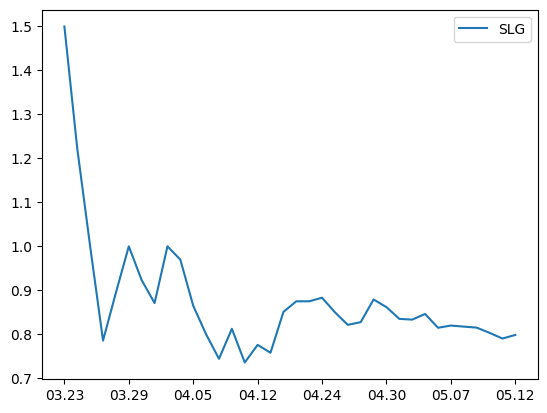

In [48]:
import sys
!{sys.executable} -m pip install matplotlib

# 장타율 시각화 하기
df_ex2.plot(y='SLG')

## 7. 요약강의

<Axes: >

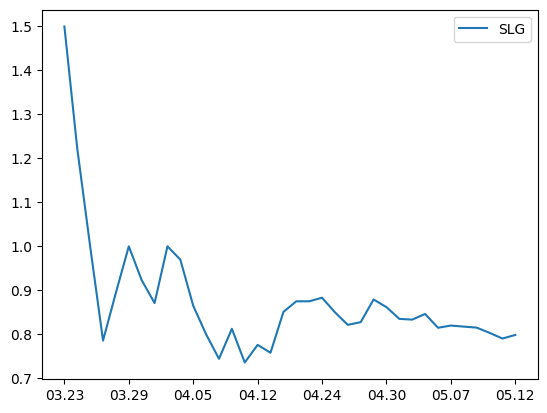

In [49]:
import pandas as pd
pd.options.display.max_rows = 6 
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션

# 해당 웹사이트의 모든 표를 데이터프레임으로 만들어 리스트에 담아준다
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=75847'
dfs = pd.read_html(url, index_col=0)

# 리스트의 모든 데이터프레임 결합하기
df_ex1 = pd.concat(dfs)

# 일부 열만 인덱싱하고 합계 행 삭제하기
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')

# 연산해서 열 만들기
df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2['누적루타'] = df_ex2['루타'].cumsum()
df_ex2['누적타수'] = df_ex2['AB'].cumsum()
df_ex2['SLG'] = df_ex2['누적루타'] / df_ex2['누적타수']

# 판다스의 시각화
df_ex2.plot(y='SLG')

**참고 사이트**

판다스 공식 문서 [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)